In [1]:
import numpy as np
import pandas as pd
from PIL import Image

In [2]:
df_can = pd.read_excel('/Users/fajri/Downloads/Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=(20),
                      skipfooter=2)
print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [3]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [4]:
print(df_can.shape)

(195, 43)


In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1,
           inplace=True)
df_can.rename(columns = {'OdName' : 'Country', 'AreaName' : 'Continent', 'RegName': 'Region'}, inplace=True)
df_can.columns = list(map(str, df_can.columns))
df_can.set_index('Country', inplace=True)
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)
years = list(map(str, range(1980, 2014)))
print ('Data dimension: ', df_can.shape)

Data dimension:  (195, 38)


In [6]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')
print('Matplotlib version: ', mpl.__version__)

Matplotlib version:  3.7.2


## Waffle Charts
Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progres menuju tujuan. Waffle Chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor Exel

In [7]:
df_dsn = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dsn

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

### Langkah 1.  Make Waffle

In [8]:
# compute the proportion of each category with respect to the total
total_values = sum(df_dsn['Total'])
category_proportions = [(float(value) / total_values) for value in df_dsn['Total']]
# print out proportions
for i, proportion in enumerate(category_proportions):
    print(df_dsn.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


### Langkah 2. Menentukan ukuran keseluruhan dari waffle chart

In [9]:
width = 40
height = 10
total_num_tiles = width * height # total number of tiles
print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


### Langkah 3. Menggunakan proporsi tiap kategori untuk menentukan jumlah ubin masing-masing kategori

In [10]:
# compute the number of tiles for each category
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
for i, tiles in enumerate(tiles_per_category):
    print(df_dsn.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


### Langkah 4. Membuat matriks yang mempunyai wafel dan mengsinya

In [11]:
# Initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width))
# Define indices to looop through waffle chart
category_index = 0
tile_index = 0
# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[row, col] = category_index
print('Waffle chart populated')

Waffle chart populated


In [12]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

### Langkah 5. Petakan matriks waffle chart menjadi visual

<Figure size 640x480 with 0 Axes>

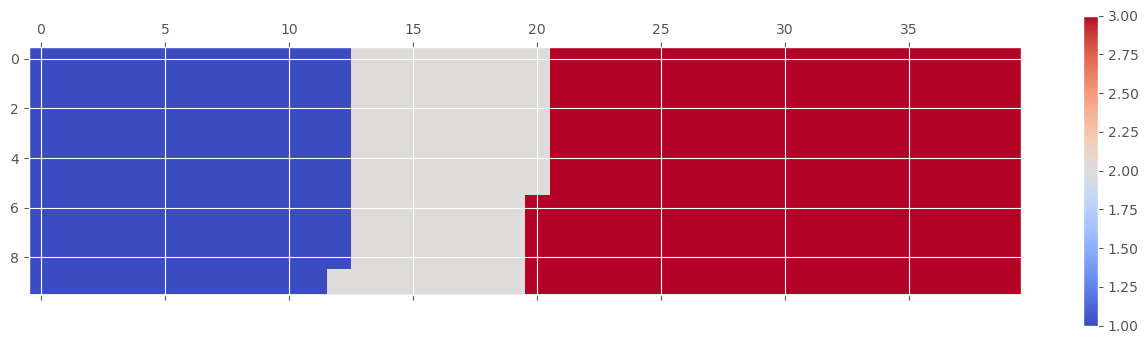

In [13]:
# instantiate a new figure object 
fig = plt.figure()
# Use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

### Langkah 6. Percantik Chart

([], [])

<Figure size 640x480 with 0 Axes>

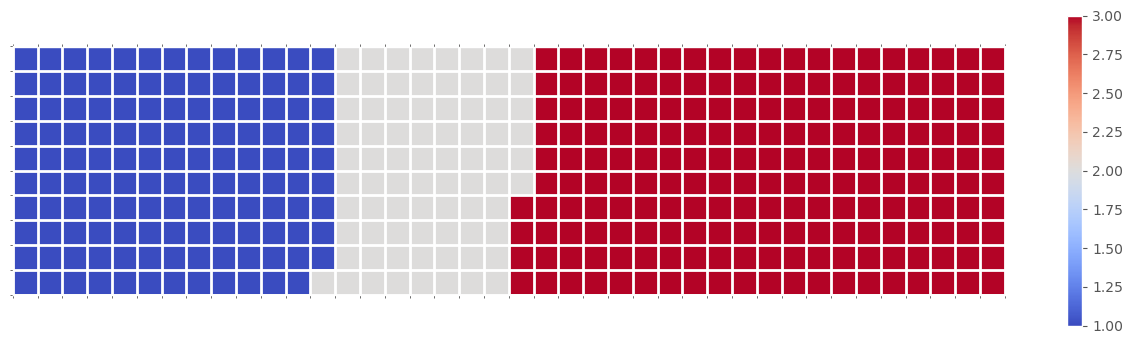

In [14]:
# instantiate a new figure object
fig = plt.figure()
# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
# get the axis
ax = plt.gca()
# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-',linewidth=2)
plt.xticks([])
plt.yticks([])

### Langkah 7. Tambahkan legend

<Figure size 640x480 with 0 Axes>

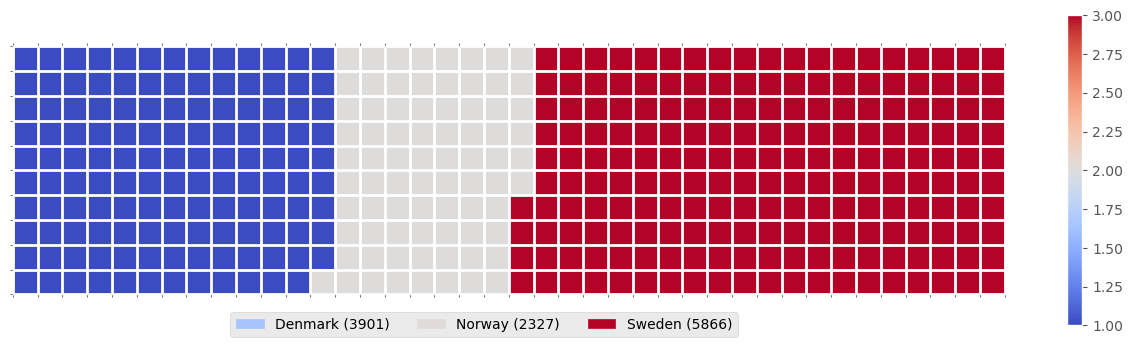

In [15]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# get the axis
ax = plt.gca()

# set minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# add gridlines based on minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

# compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

# create legend
legend_handles = []
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

# add legend to chart
plt.legend(handles= legend_handles,
          loc='lower center',
          ncol=len(df_dsn.index.values),
          bbox_to_anchor=(0., -0.2, 0.95, 1)
          )

## Langkah membuat waffle chart dengan satu function

In [16]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_dsn.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )

In [17]:
width = 48
height = 10
categories = df_dsn.index.values
values = df_dsn['Total']
colormap = plt.cm.coolwarm

Total number of tiles is 480
Denmark: 155
Norway: 92
Sweden: 233


<Figure size 640x480 with 0 Axes>

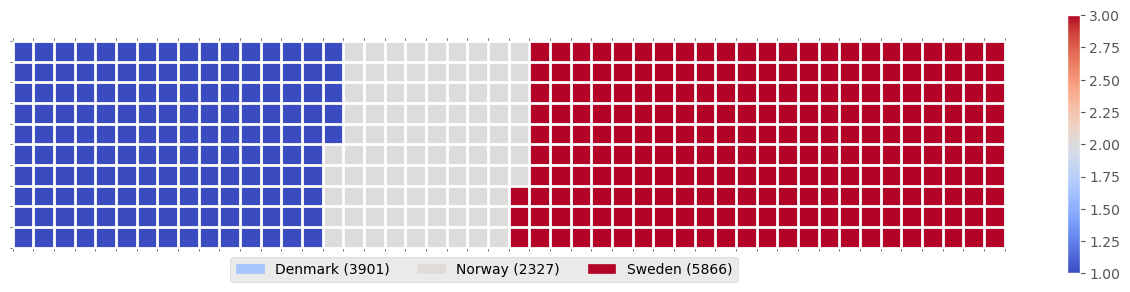

In [18]:
create_waffle_chart(categories, values, height, width, colormap)

# Word Clouds
Word Clouds bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin dan tebal kata itu muncul di kata cloud

In [19]:
from wordcloud import WordCloud, STOPWORDS
print('WordCloud is installed and imported')

WordCloud is installed and imported


## Wordcloud biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. 

In [20]:
alice_novel = open('/Users/fajri/Desktop/alice_novel/alice_novel.txt', 'r').read()

In [21]:
stopwords = set(STOPWORDS)

In [22]:
#instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)
#generate the word cloud
alice_wc.generate(alice_novel)

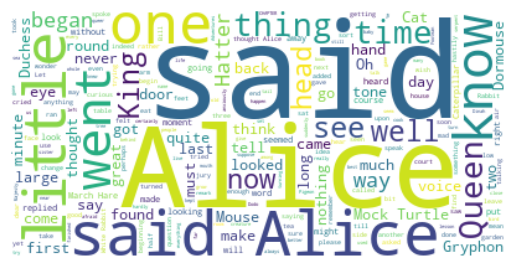

In [23]:
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

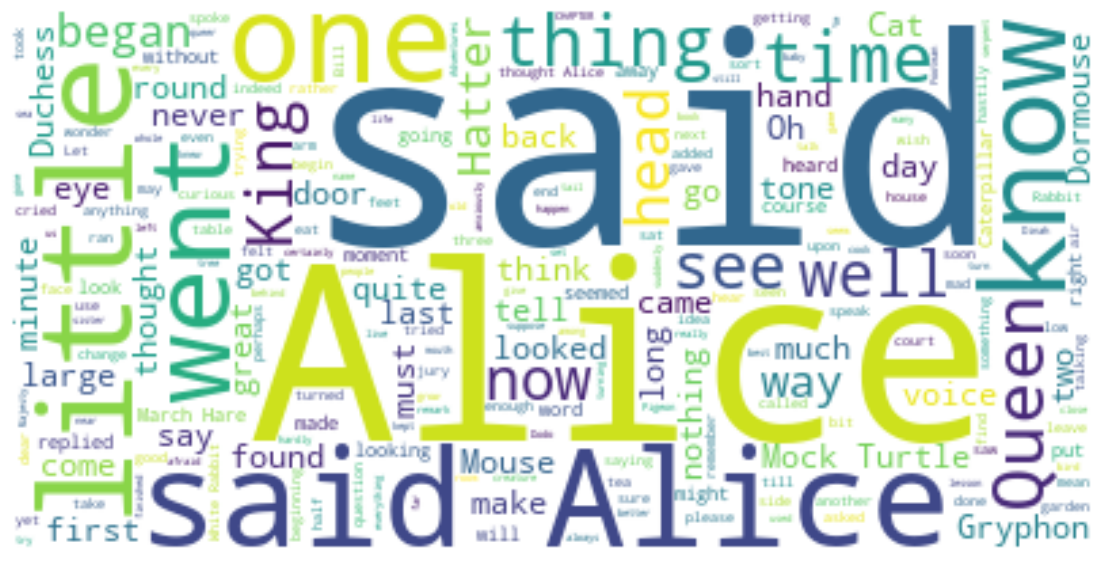

In [24]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height
# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

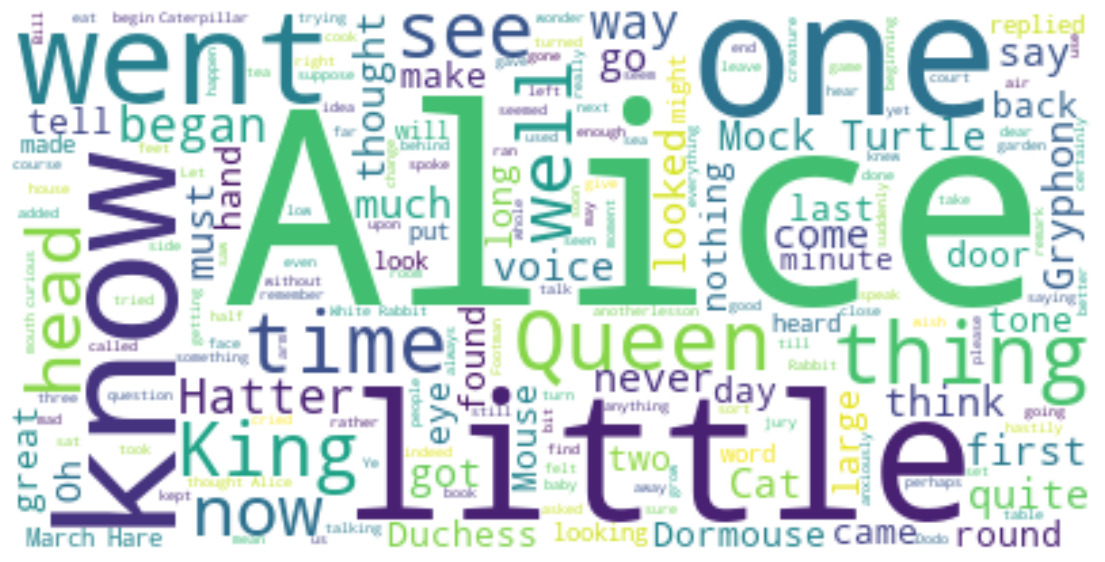

In [25]:
stopwords.add('said') # add the words said to stopwords
# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [26]:
# save mask to alice_mask
alice_mask = np.array(Image.open('/Users/fajri/Desktop/alice_novel/alice_mask.png'))
print('Image downloaded and saved!')

Image downloaded and saved!


In [27]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

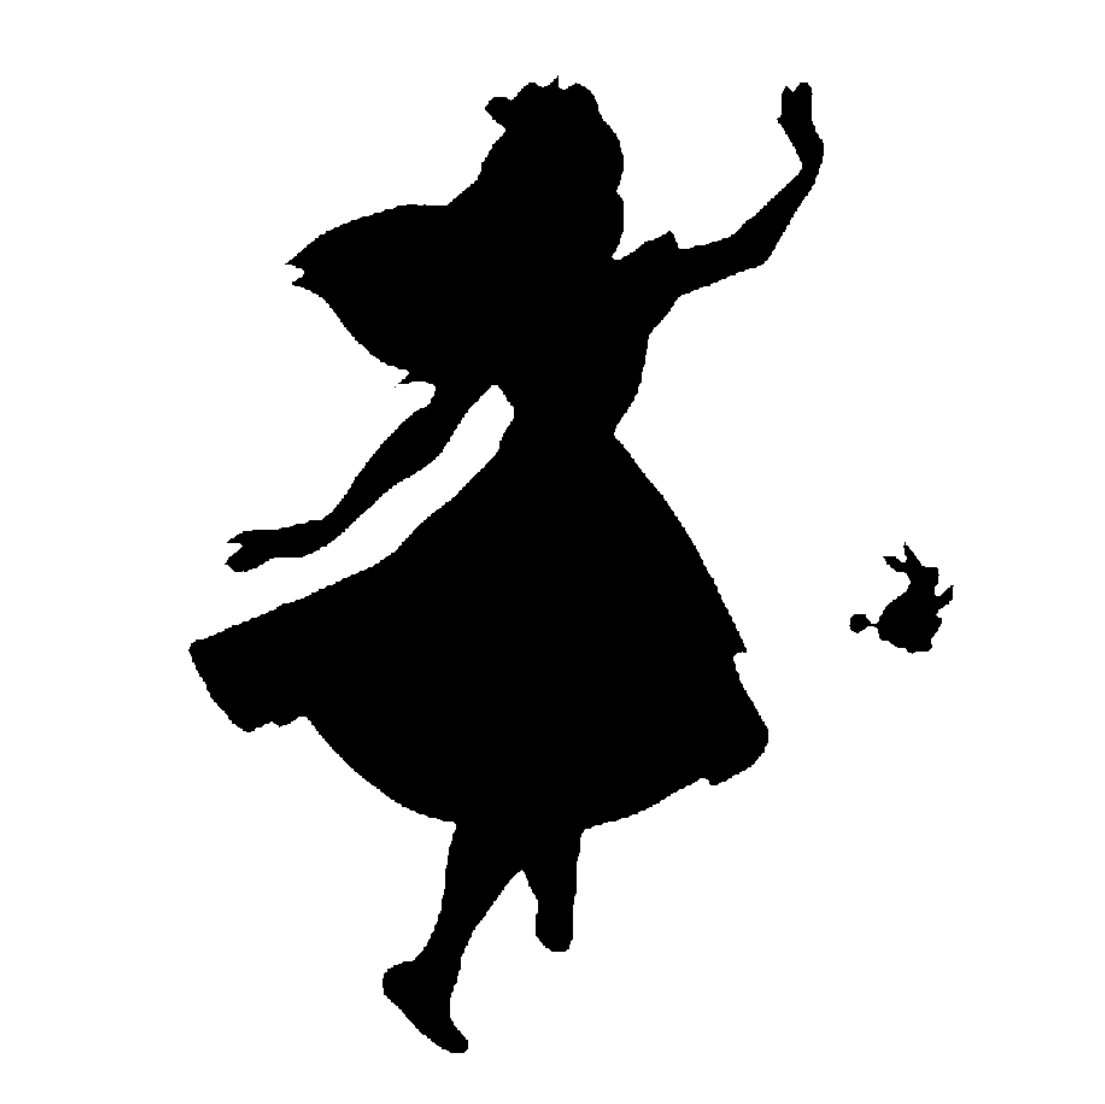

In [28]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

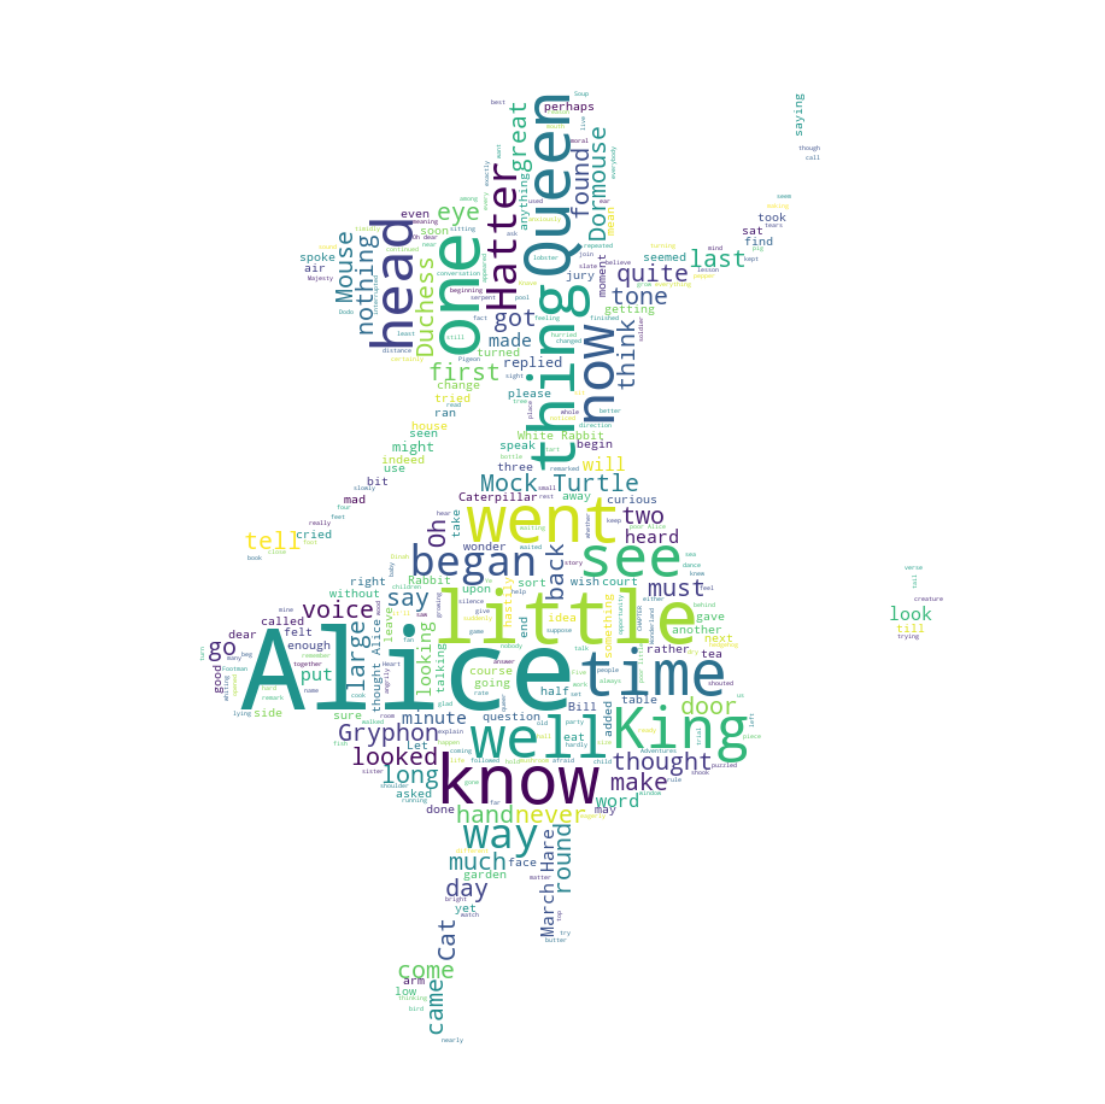

In [29]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000,
                    mask=alice_mask, stopwords = stopwords)
#generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [31]:
total_immigration = df_can['Total'].sum()
total_immigration

6409153

In [32]:
max_word = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total'] / float(total_immigration) * max_word)
        word_string = word_string + ((country + ' ') * repeat_num_times)
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [33]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)
print('Word cloud created!')

Word cloud created!


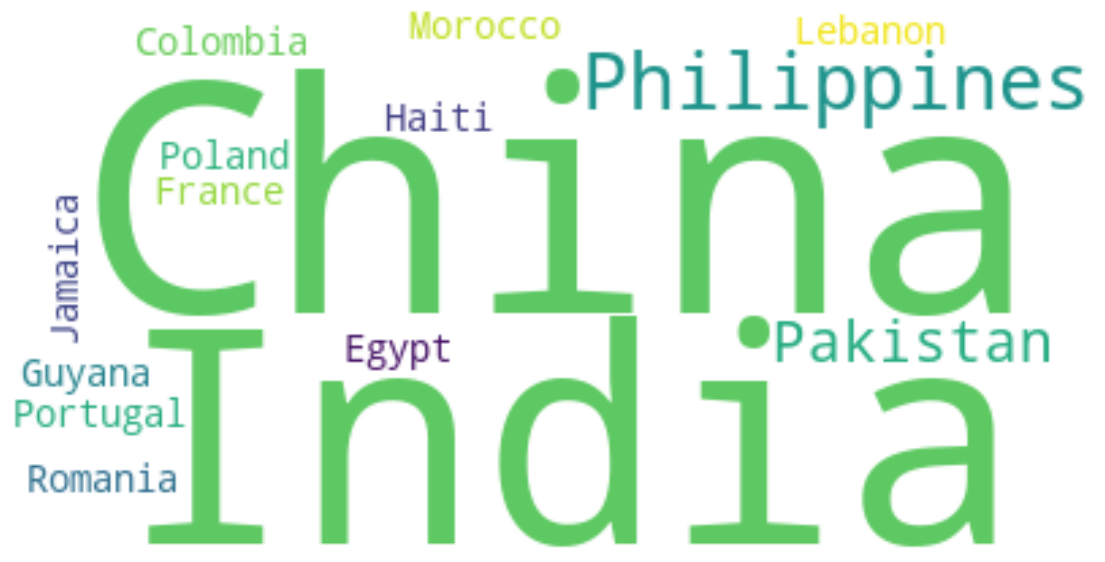

In [34]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis('off')
plt.show()

# Regression Plots
Di section ini, kita akan menjelajahi seaborn dan melihat seberapa efisiennya membuat garis regresi dan menyesuaikannya menggunakan pustaka ini!

In [35]:
import seaborn as sns
print('Seaborn installed and imported!')

Seaborn installed and imported!


## Membuat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980-2013

In [36]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type floar (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns 
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

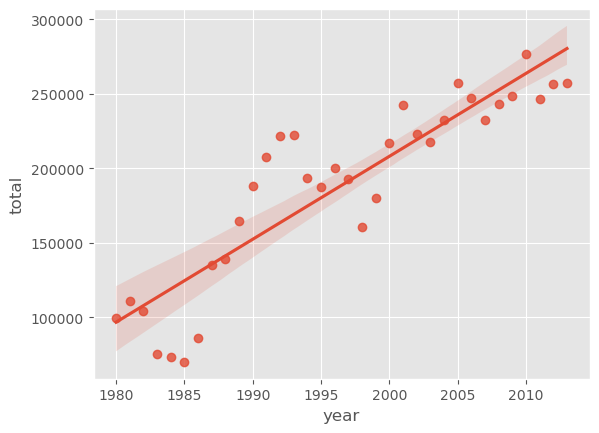

In [37]:
ax = sns.regplot(x='year', y='total', data=df_tot)

## Menyesuaikan warna scatter plot dan garis regresi

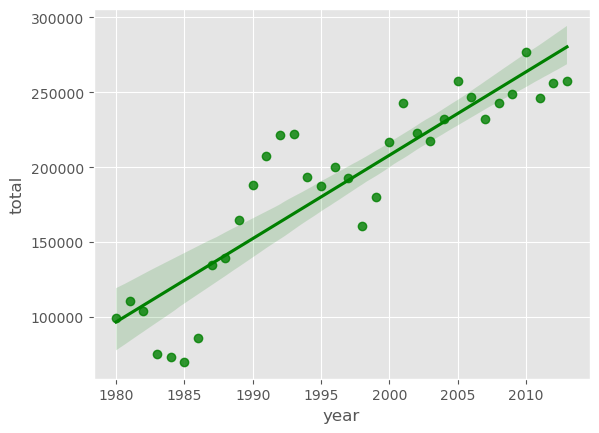

In [38]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green')

## Menyesuaikan bentuk marker

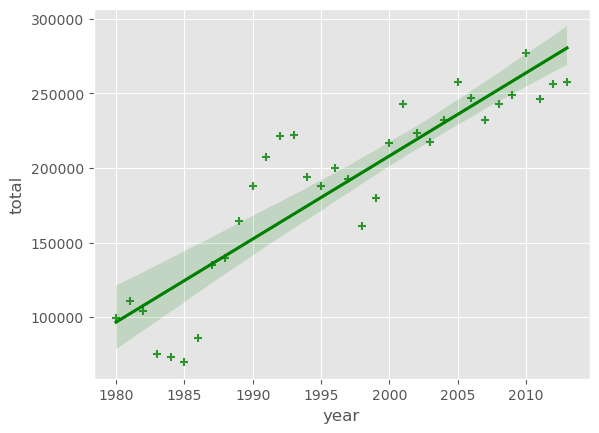

In [39]:
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

## Memperbesar plot

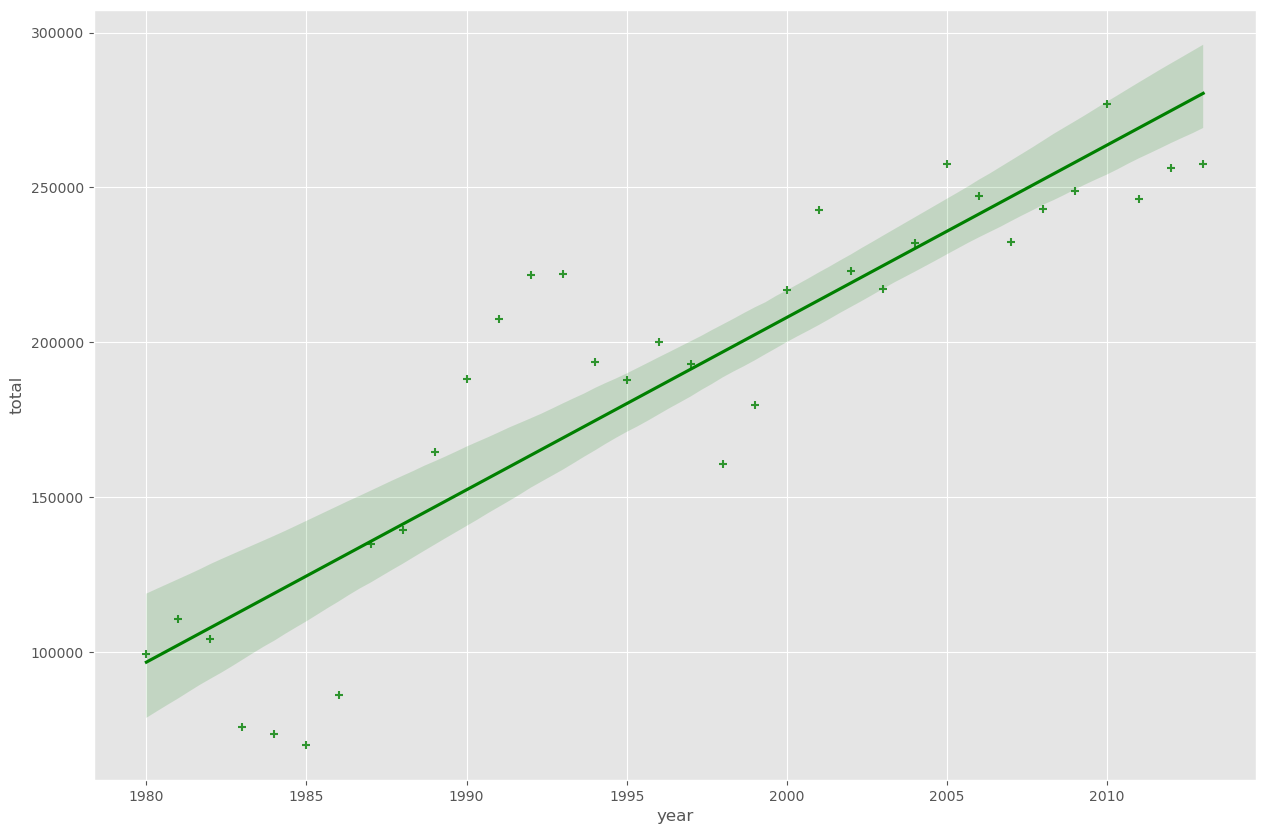

In [40]:
plt.figure(figsize=(15, 10))
ax = sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+')

## Meningkatkan ukuran font pada label tanda centang, judul, dan label x dan y aagar tidak terlihat berbeda!

Text(0.5, 1.0, 'Total Immigration to Canada form 1980-2013')

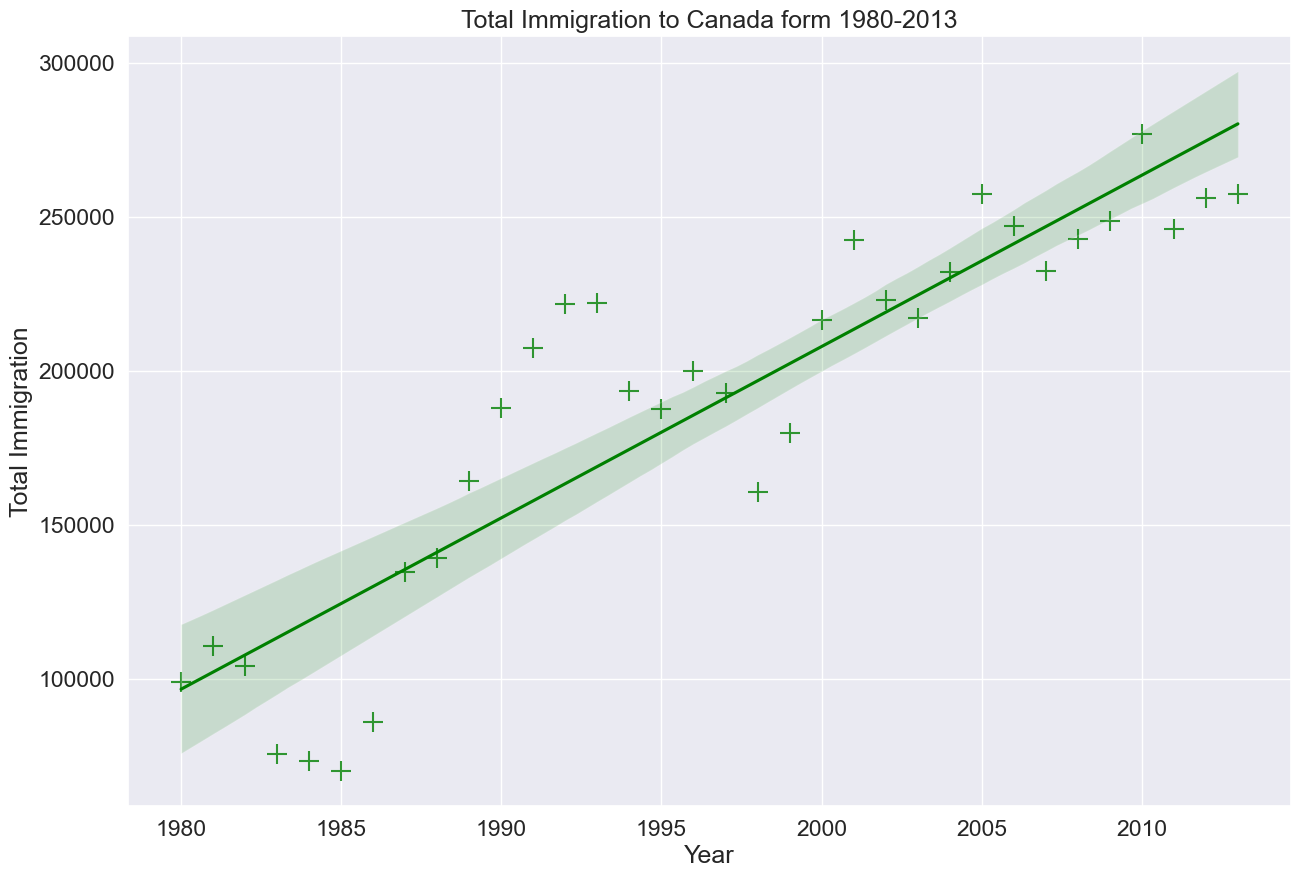

In [41]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.5)
ax = sns.regplot(x='year', y='total', data=df_tot, color='green',
                marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada form 1980-2013')

## Mengganti Background Menjadi Putih

Text(0.5, 1.0, 'Total Immigration to Canada form 1980-2013')

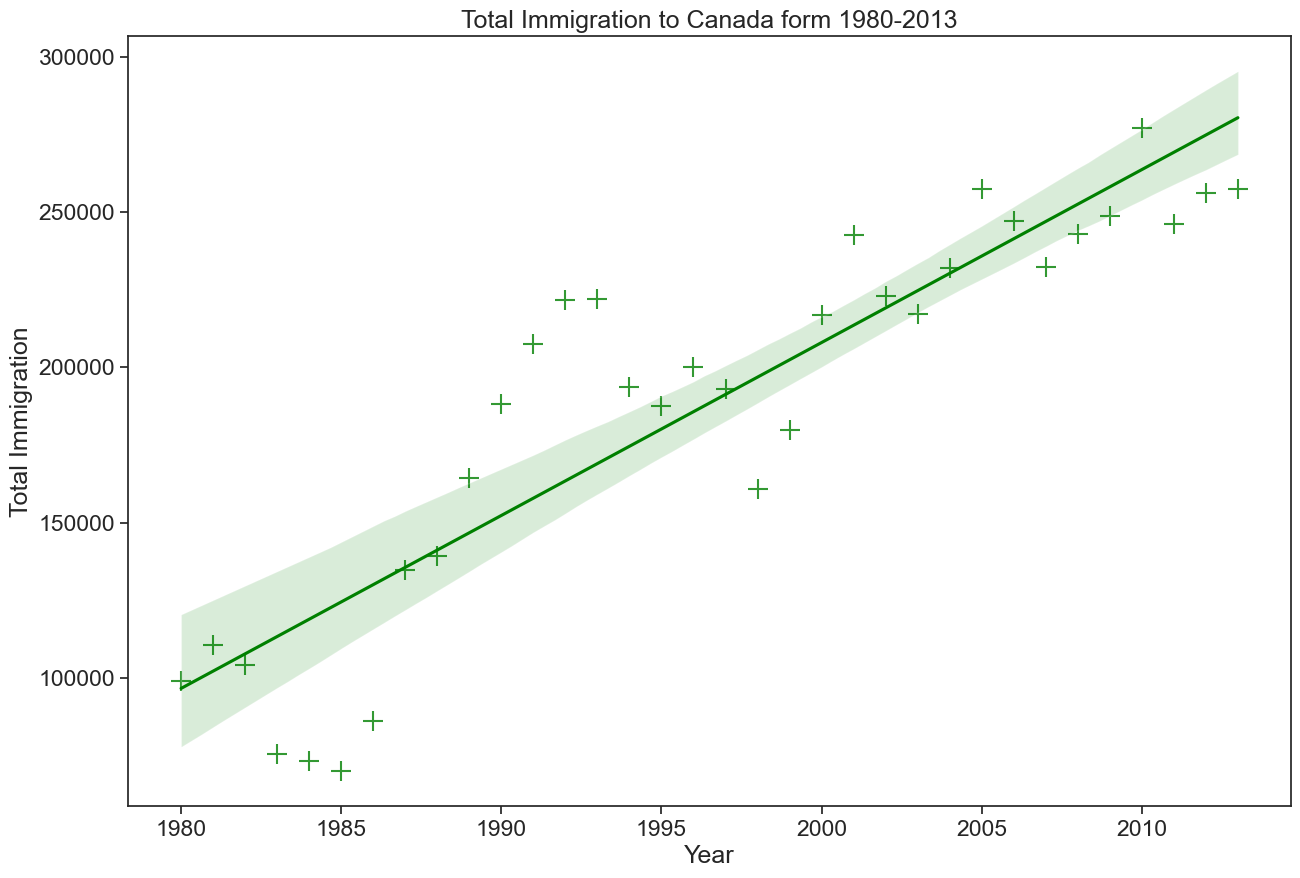

In [42]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.5)
sns.set_style('ticks') # Change backround to white background
ax = sns.regplot(x='year', y='total', data=df_tot, color='green',
                marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada form 1980-2013')

## Menambahkan Grid ke Latar Belakang Putih

Text(0.5, 1.0, 'Total Immigration to Canada form 1980-2013')

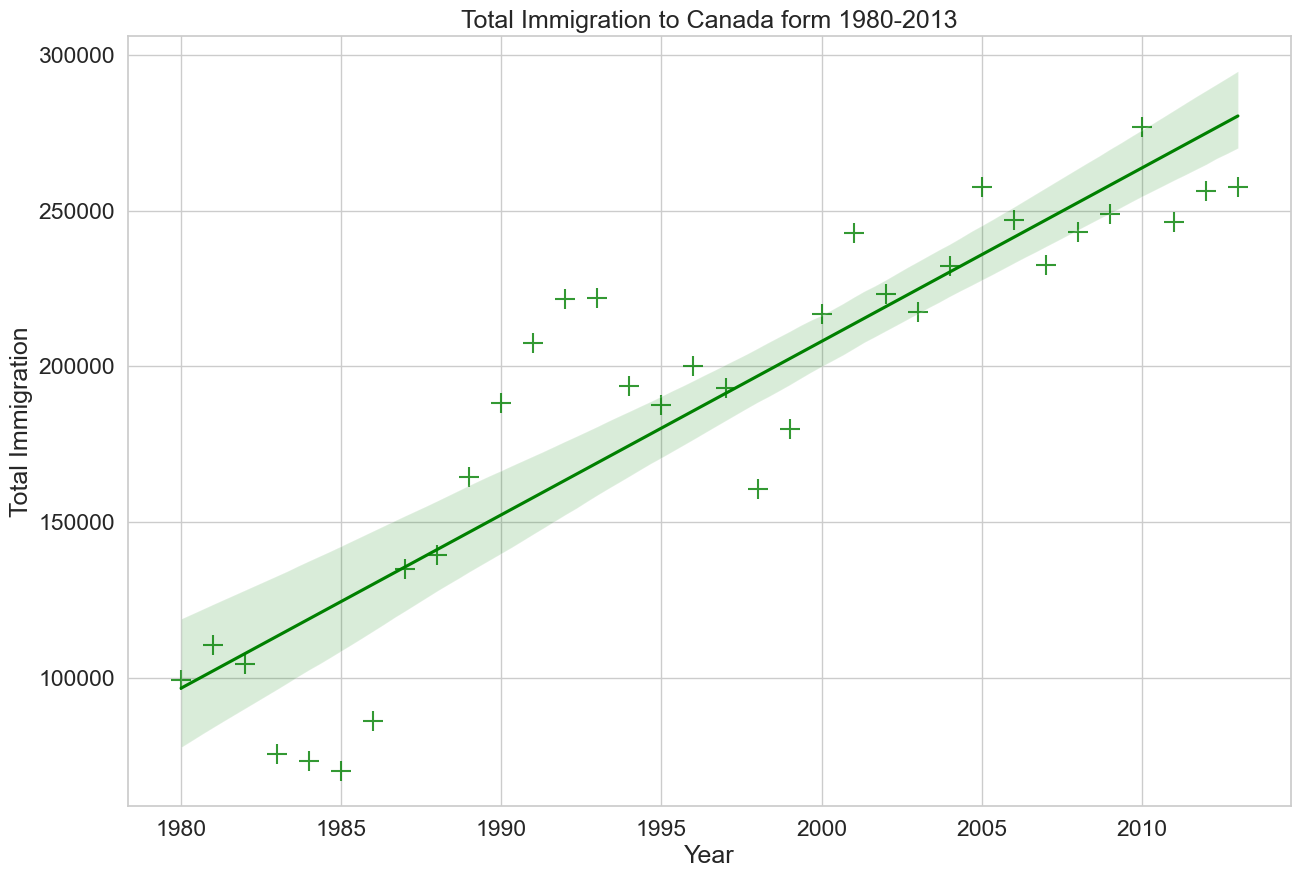

In [43]:
plt.figure(figsize=(15, 10))
sns.set(font_scale = 1.5)
sns.set_style('whitegrid') # Change backround to white background
ax = sns.regplot(x='year', y='total', data=df_tot, color='green',
                marker='+', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada form 1980-2013')

## Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980-2013

Text(0.5, 1.0, 'Total Immigration form Denmark, Sweden, and Norway to Canada form 1980-2013')

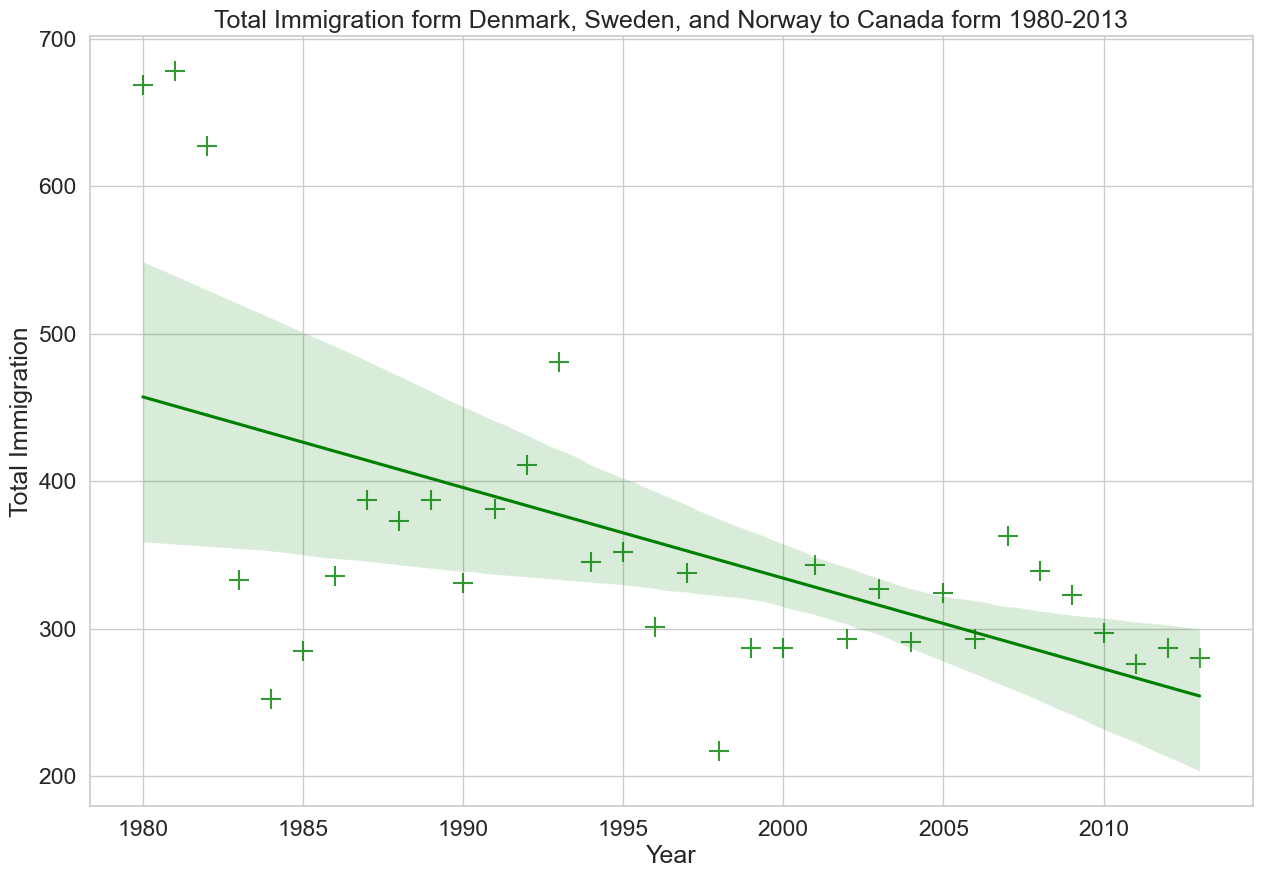

In [44]:
# Create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()

# Create df_total by summing accross three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# Reset index in place 
df_total.reset_index(inplace=True)

# Rename columns
df_total.columns = ['year', 'total']

# Change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# Define figure size
plt.figure(figsize=(15, 10))

# Define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

# generate plot and add title and axes labels
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration form Denmark, Sweden, and Norway to Canada form 1980-2013')

# Part 2
Di section ini, kita akan memplejari cara membuat peta untuk berbagai tujuan, Untuk melakukannya, kita akan berpisah dengan Matplotlib dan bekerja dengan pustaka Phyton lain, yaitu Folium.

In [45]:
import folium
print('Folium installed and imported')

Folium installed and imported


In [46]:
# Define the World map
world_map = folium.Map()
world_map

In [47]:
# define the world map centered around Semarang with a higher zoom level
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)
world_map

In [48]:
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)
world_map

## A. Stamen Toner Maps
Stamen Toner adalah peta B+W (hitam dan putih) dengan kontras tinggi. Stemen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones

In [49]:
# create a Stamen Toner Map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.42707485], zoom_start=13, tiles='Stamen Toner')
world_map

## B. Stemen Terrain Maps
Stemen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stemen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan denga dua jalur

In [50]:
# create a Stamen Terrain Map of the world centered around Semarang
world_map = folium.Map(location=[-6.9902851, 110.42707485], zoom_start=13, tiles='Stamen Terrain')
world_map

# Maps with Markers

In [51]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [52]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

In [53]:
df_incidents.shape

(150500, 13)

In [54]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [55]:
df_incidents.shape

(100, 13)

In [56]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [57]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

### Sekarang mari kita taruh lokasi kejahatan ke dalam peta

In [58]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle makers to be
            color='red',
            fill=True,
            fill_color = 'yellow',
            fill_opacity=0.6
        )
    )
# add incidents to map
sanfran_map.add_child(incidents)

In [59]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crime and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
             color = 'yellow',
             fill=True,
             fill_color='blue',
             fill_opacity=0.6
        )
    )
    
# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=labels).add_to(sanfran_map)

# add incidents to map
sanfran_map.add_child(incidents)

In [60]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop through the 100 crimes and add each to map
for lat, lng, label in zip(df_incidents.Y, df_incidents.X,df_incidents.Category):
    folium.CircleMarker(
        [lat, lng],
        radius= 5,
        color='yellow',
        fill=True,
        popup=label,
        fill_color='blue',
        fill_opacity=0.6).add_to(sanfran_map)
sanfran_map

In [61]:
from folium import plugins
# let's start again with a clean copy of the map of San Fransisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
    location = [lat, lng],
    icon = None,
    popup=label,
    ).add_to(incidents)
sanfran_map

# Choropleth Maps
Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkam di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberikan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukan tingkat variabelitas dalam suatu wilayah

In [62]:
df_can = pd.read_excel('/Users/fajri/Downloads/Canada.xlsx',
                      sheet_name='Canada by Citizenship',
                      skiprows=(20),
                      skipfooter=2)
print('Data downloaded and read into a dataframe')

Data downloaded and read into a dataframe


In [63]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [64]:
# print the dimensions of the dataframe
print(df_can.shape)

(195, 43)


In [65]:
# clean up the dataset to remove unncecassary columns (eg, REG)
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)

# let's rename the columns so that they make sense
df_can.rename(columns={'OdName' : 'Country', 'AreaName':'Continent', 'RegName' : 'Region'}, inplace=True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# add total to column
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)

# years that we will using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print('data dimension:', df_can.shape)

data dimension: (195, 39)


In [66]:
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  
2  3774  4331  69439  
3     0     0      6  
4     1     1     15  

[5 rows x 39 columns]

In [68]:
!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json
print('GeoJSON file downloaded!')

GeoJSON file downloaded!


In [84]:
world_geo = r'world_countries.json'
# create a plain world map
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='cartodb positron')

# generate choropleth map using the total immigration of each country to Canada from 1980 - 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Yellow, Orange, Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)
world_map

/Users/fajri/anaconda3/lib/python3.11/site-packages/folium/folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
